# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [ ]:
print('Gabriel Borges Gutierrez' + ' 237300')

Name1 RA1
Name2 RA2


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems.

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 42,000 training examples, and 28,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from PIL import Image

## ------ Read Dataset ----- ##
df = pd.read_csv('digit_recognizer_train.csv')
df = df.sample(frac=1)
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36335,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41560,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33406,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22210,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


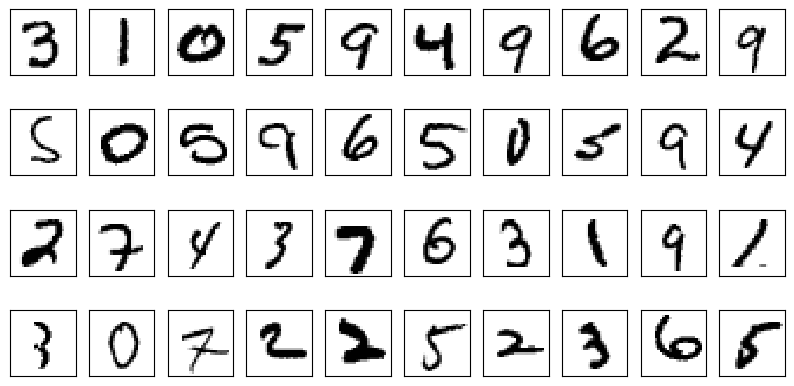

In [3]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

In [4]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


In [5]:
# TODO: Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

X = df.drop('label', axis='columns')
y = df['label']

pca = PCA(n_components=2)

reducted = pca.fit_transform(X)


reduced_df = pd.DataFrame(reducted)

reduced_df["label"] = y

reduced_df

,0,1,label
0,62.142746,-676.637413,1
1,-906.419340,-323.930059,0
2,1352.518770,142.074855,1
3,-169.186952,-285.764784,4
4,98.746990,946.689376,0
...,...,...,...
41995,-16.030328,-701.574816,0
41996,-259.649290,-531.193902,1
41997,-944.838230,-501.545741,7
41998,641.480109,-126.003801,6


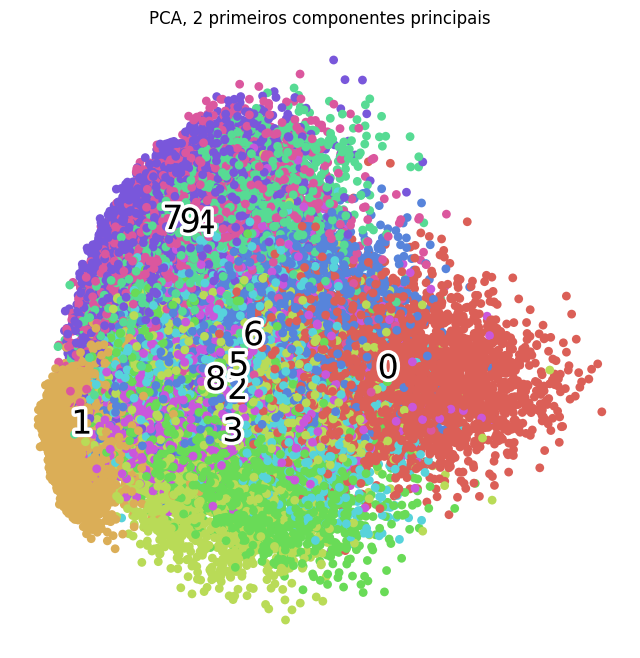

In [6]:
scatter(reducted, y)
plt.title('PCA, 2 primeiros componentes principais')
plt.show()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

In [7]:
# TODO: T-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

reducted = tsne.fit_transform(X)

reduced_df = pd.DataFrame(reducted)

reduced_df["label"] = y

reduced_df

,0,1,label
0,25.481979,-58.552876,1
1,-10.784189,-102.814034,0
2,61.217510,59.751209,1
3,46.007992,71.930634,4
4,18.600508,86.852997,0
...,...,...,...
41995,26.901171,-11.289091,0
41996,18.735428,-15.188391,1
41997,-88.143021,-57.545879,7
41998,86.430618,-14.756340,6


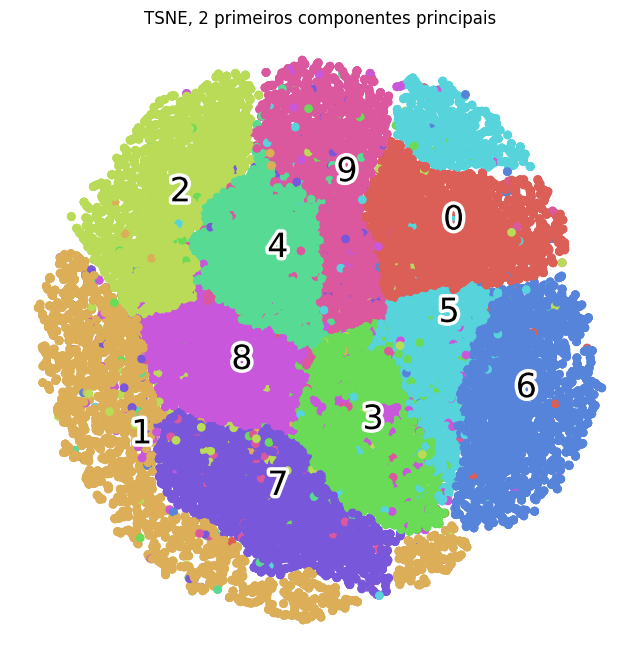

In [8]:
scatter(reducted, y)
plt.title('TSNE, 2 primeiros componentes principais')
plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

In [ ]:
# TODO: PCA + t-SNE

(0.25 point) Plot a 3D graph using the best representation founded.

In [9]:
# TODO: 3D Graph

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3)

reducted = tsne.fit_transform(X)

reduced_df = pd.DataFrame(reducted)

reduced_df["label"] = y

reduced_df

,0,1,2,label
0,13.054689,5.243917,-13.414092,1
1,-25.200357,36.842461,6.132962,0
2,-26.441694,17.319088,-3.035797,1
3,-4.642309,11.506775,-47.882862,4
4,-14.755720,-5.202265,29.153164,0
...,...,...,...,...
41995,15.126416,9.124081,-40.176075,0
41996,13.349712,18.605001,-32.724960,1
41997,-10.448243,29.766399,32.069073,7
41998,27.841965,-28.861610,6.134184,6


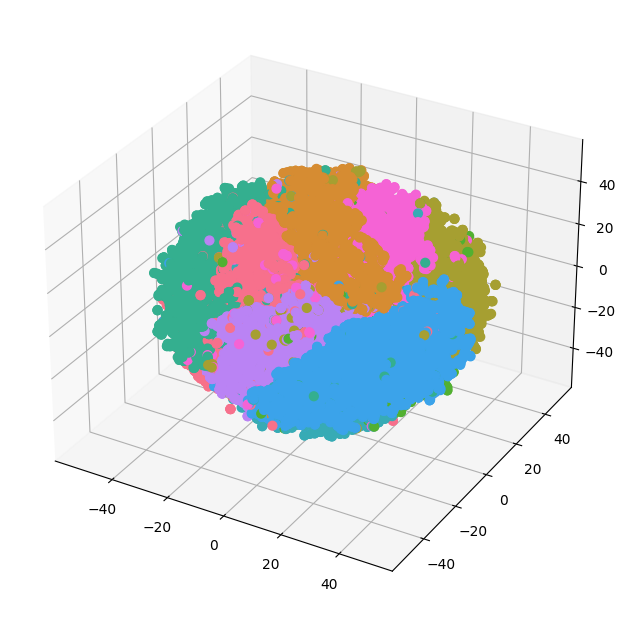

<Figure size 640x480 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(reduced_df[0], reduced_df[1], reduced_df[2], s=40, c=y, marker='o', cmap=cmap, alpha=1)

plt.show ()


**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [ ]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.show()

In [ ]:
## Plot the original images using two arrays: 
#    best_embedding with the components (n_components=2) from either PCA or t-SNE;
#    images with the original data. Both arrays should correspond to the same data.

#plot_images(best_embedding, df)

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [ ]:
# Uniform Manifold Approximation and Projection (UMAP)

## 2. Unsupervised Learning

The main idea of this section is to train an unsupervised learning algorithm to identify the possible groups present in the MNIST dataset. 

(0.25 point) Train a KMeans algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the KMeans algorithm.*

In [3]:
# TODO: KMeans with a dimension reduction technique.
from sklearn.cluster import KMeans

test = pd.read_csv('digit_recognizer_test.csv')

k_means = KMeans(n_clusters=10)

k_means.fit(X)


C:\Users\gabre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

In [ ]:
# TODO: Elbow Method and 2D plot

(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

In [ ]:
# TODO: Silhouette Method -- Average Score and plot

(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of KMeans and the original data distribution.

In [ ]:
# TODO: Unsupervised Algorithm of your choose

**(2 points) Questions:**

- Did KMeans provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did KMeans perform better? How can different clustering techniques be compared?

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [ ]:
# TODO: Baseline Model

(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

In [ ]:
# TODO: Baseline Model with PCA

(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [ ]:
# TODO: Evaluate models in Test split

**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**